<a href="https://colab.research.google.com/github/Sooryakiran/CS6886_SysDL/blob/master/assignment_3/Submission/Step%202/step_2_pareto_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pareto plots

In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter

### Load the datsaset

This CSV file was generated by modifying the one generated using MLflow ui. The CSV file from 2 experiments were merged.

In [0]:
!wget https://raw.githubusercontent.com/Sooryakiran/CS6886_SysDL/master/assignment_3/Step%202/parieto_data.csv --no-verbose

2020-05-04 16:48:26 URL:https://raw.githubusercontent.com/Sooryakiran/CS6886_SysDL/master/assignment_3/Step%202/parieto_data.csv [3578/3578] -> "parieto_data.csv" [1]


In [0]:
df           = pd.read_csv("parieto_data.csv")
accuracy_raw = np.asarray(df["Test Accuracy"])*100
time_raw     = np.asarray(df["Training time"])

In [0]:
def make_pareto(raw_data, label, units = "", num_bins = 10):
    """
    This function plots a pareto plot from the given continious data using matplotlib.

    @param raw_data : 1D np.array
    @param label    : Label to be printed on the x-axis
    @param units    : Unit of x-axis
    @param num_bin  : Number of bins in the x axis

    """
    minimum  = np.min(raw_data)
    maximum  = np.max(raw_data)
    bin_size = (maximum-minimum)/num_bins
    bins     = [0]*num_bins

    for i in range(raw_data.shape[0]):
        bin_id = int((raw_data[i] - minimum)/bin_size)
        if bin_id == num_bins:
            bin_id -= 1
        bins[bin_id] += 1
    
    sorted_bins = -np.sort(-np.asarray(bins))
    
    labels = []
    cum_percentage = []
    total = 0
    sum = np.sum(np.asarray(sorted_bins))
    for item in sorted_bins:
        idx = bins.index(item)
        bins[idx] = maximum + 1
        min_val = minimum + idx*bin_size
        max_val = min_val + bin_size
        current_label = label + " : %0.2f" %min_val + units + " - " + "%0.2f" %max_val + units

        total = total + item
        percentage = total*100/sum
        cum_percentage.append(percentage)
        labels.append(current_label)


    mpl.style.use('seaborn')
    fig, ax = plt.subplots()
    ax.bar(labels, sorted_bins, color="C0")
    plt.xticks(rotation = 90)
    ax.set_ylabel('Number of models')
    ax.yaxis.label.set_color("C0")

    ax2 = ax.twinx()
    ax2.plot(labels, cum_percentage, color="C1", marker="o", ms=7)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.set_ylabel("Cumilative percentage")
    ax2.yaxis.label.set_color("C1")
    ax2.grid()
    
    ax.tick_params(axis="y", colors="C0")
    ax2.tick_params(axis="y", colors="C1")

    plt.show()
    return True

### Make the pareto plots

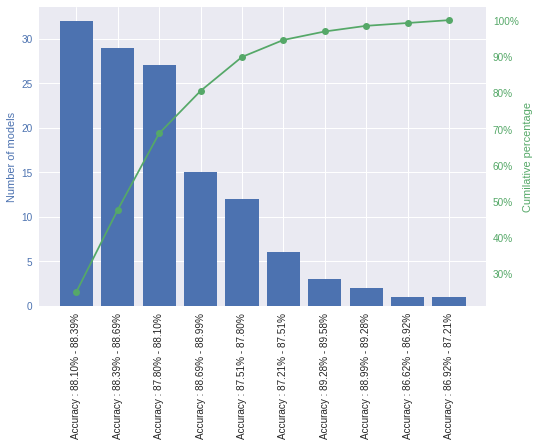

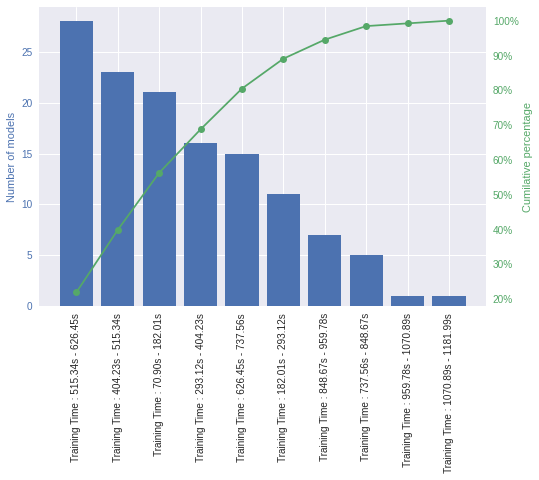

True

In [0]:
make_pareto(raw_data = accuracy_raw, label = "Accuracy", units = "%")
make_pareto(raw_data = time_raw, label = "Training Time", units = "s")